## Step 1: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(['EIN', 'NAME'], 1)

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [5]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE             9
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
type_counts = application_df.APPLICATION_TYPE.value_counts() 
type_counts

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

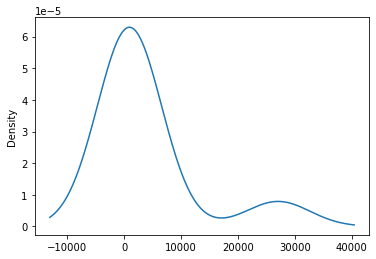

In [7]:
# Visualize the value counts of APPLICATION_TYPE
type_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
replace_application = list(type_counts[type_counts < 500].index)

# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
class_counts = application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

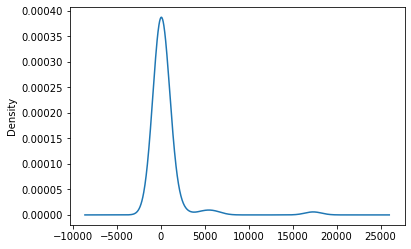

In [10]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Split our preprocessed data into our features and target arrays
y = application_df["IS_SUCCESSFUL"].values
X = application_df.drop(["IS_SUCCESSFUL"],1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


In [15]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Attempt 1: Automated_NN_Optimizer  

In [16]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh','sigmoid'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=100,
        step=2), activation=activation))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 6)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=100,
            step=2),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [17]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2)

/Users/daniellesilvaggio/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  
2022-07-05 10:18:54.163445: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [18]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 00m 44s]
val_accuracy: 0.728396475315094

Best val_accuracy So Far: 0.7289795875549316
Total elapsed time: 00h 16m 27s
INFO:tensorflow:Oracle triggered exit


In [19]:
best_hyper = tuner.get_best_hyperparameters(1)[0]
best_hyper.values

{'activation': 'tanh',
 'first_units': 63,
 'num_layers': 1,
 'units_0': 35,
 'units_1': 37,
 'units_2': 27,
 'units_3': 73,
 'units_4': 31,
 'units_5': 69,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [20]:
# Evaluate best model against full test data
best_model = tuner.get_best_models(1)[0]
model_loss, model_accuracy = best_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5500 - accuracy: 0.7290 - 592ms/epoch - 2ms/step
Loss: 0.549992024898529, Accuracy: 0.7289795875549316


## Attempt 2: Adding More Neurons to the Hidden Layers

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 50

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 90)                3960      
                                                                 
 dense_8 (Dense)             (None, 50)                4550      
                                                                 
 dense_9 (Dense)             (None, 1)                 51        
                                                                 
Total params: 8,561
Trainable params: 8,561
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [29]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [31]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:32 - loss: 1971.0615 - accuracy: 0.5000
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 15449.0752 - accuracy: 0.5000 
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 20/804 [..............................] - ETA: 4s - loss: 157626.4688 - accuracy: 0.4844
Epoch 1: saving model to checkpoints/weights.01.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 117236.5391 - accuracy: 0.5023
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 91044.1094 - accuracy: 0.5196 
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 45/804 [>.............................] - ETA: 4s - loss

360/804 [============>.................] - ETA: 3s - loss: 66058.2422 - accuracy: 0.4927
Epoch 1: saving model to checkpoints/weights.01.hdf5
368/804 [============>.................] - ETA: 3s - loss: 64672.5742 - accuracy: 0.4910
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
375/804 [============>.................] - ETA: 3s - loss: 72665.5234 - accuracy: 0.4910
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
385/804 [=============>................] - ETA: 3s - loss: 74653.4297 - accuracy: 0.4915
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
396/804 [=============>................] - ETA: 3s - loss: 73379.3672 - accuracy: 0.4936
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 72322.8359 - ac

777/804 [===========================>..] - ETA: 0s - loss: 56903.9844 - accuracy: 0.5025
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
787/804 [============================>.] - ETA: 0s - loss: 56200.0781 - accuracy: 0.5022
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
799/804 [============================>.] - ETA: 0s - loss: 55473.4961 - accuracy: 0.5025
Epoch 1: saving model to checkpoints/weights.01.hdf5
804/804 [==============================] - 6s 6ms/step - loss: 55141.3633 - accuracy: 0.5027
Epoch 2/100

Epoch 2: saving model to checkpoints/weights.02.hdf5
  1/804 [..............................] - ETA: 15s - loss: 672.3218 - accuracy: 0.4688
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 11/804 [..............................] - ETA: 4s - loss: 486.7567 - accuracy: 0.5114 
Epoch 2: saving model to

394/804 [=============>................] - ETA: 2s - loss: 84978.1953 - accuracy: 0.4970
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 83160.5703 - accuracy: 0.4985
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
415/804 [==============>...............] - ETA: 1s - loss: 81468.2969 - accuracy: 0.4994
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
426/804 [==============>...............] - ETA: 1s - loss: 79753.8203 - accuracy: 0.5000
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
438/804 [===============>..............] - ETA: 1s - loss: 77708.9609 - accuracy: 0.4993
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving mod

  7/804 [..............................] - ETA: 6s - loss: 295.6723 - accuracy: 0.4732
Epoch 3: saving model to checkpoints/weights.03.hdf5
 16/804 [..............................] - ETA: 5s - loss: 405.1970 - accuracy: 0.4434
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 22/804 [..............................] - ETA: 5s - loss: 1360.0685 - accuracy: 0.4616
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 32/804 [>.............................] - ETA: 5s - loss: 9190.9170 - accuracy: 0.4648
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 42/804 [>.............................] - ETA: 5s - loss: 7027.3467 - accuracy: 0.4680
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 52/804 [>.............................] - ETA: 5s - loss: 5723.9814 - accuracy: 


Epoch 3: saving model to checkpoints/weights.03.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 7900.7480 - accuracy: 0.4761
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 7769.5034 - accuracy: 0.4762
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 8411.7207 - accuracy: 0.4765
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
442/804 [===============>..............] - ETA: 2s - loss: 8876.2344 - accuracy: 0.4761
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
453/804 [===============>..............] - ETA: 2s - loss: 13175.7051 - accuracy: 0.4755
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model t

 28/804 [>.............................] - ETA: 4s - loss: 6001.5225 - accuracy: 0.5212
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 5789.7109 - accuracy: 0.5074
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 5367.1431 - accuracy: 0.4954
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 6564.5864 - accuracy: 0.4914
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 38882.4297 - accuracy: 0.4871
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 78/804 [=>.............


Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
498/804 [=================>............] - ETA: 1s - loss: 35993.5703 - accuracy: 0.4863
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 34944.8086 - accuracy: 0.4872
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 33957.9062 - accuracy: 0.4872
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 35215.5938 - accuracy: 0.4881
Epoch 4: saving model to checkpoints/weights.04.hdf5


128/804 [===>..........................] - ETA: 4s - loss: 6302.3481 - accuracy: 0.5002
Epoch 5: saving model to checkpoints/weights.05.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 6161.0400 - accuracy: 0.5010
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
139/804 [====>.........................] - ETA: 4s - loss: 5810.8682 - accuracy: 0.5031
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
149/804 [====>.........................] - ETA: 4s - loss: 5424.1147 - accuracy: 0.5034
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 5087.1855 - accuracy: 0.5102
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
169/804 [=====>........................] - ETA: 4s - loss: 4787.6348 - accuracy

519/804 [==================>...........] - ETA: 2s - loss: 19478.8672 - accuracy: 0.4960
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 19214.5488 - accuracy: 0.4953
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 18809.0430 - accuracy: 0.4952
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 18891.2812 - accuracy: 0.4950
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
564/804 [====================>.........] - ETA: 1s - loss: 18791.0352 - accuracy: 0.4945
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving mod

145/804 [====>.........................] - ETA: 2s - loss: 13956.7412 - accuracy: 0.4886
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
160/804 [====>.........................] - ETA: 2s - loss: 13861.8174 - accuracy: 0.4936
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
173/804 [=====>........................] - ETA: 2s - loss: 13010.7354 - accuracy: 0.5023
Epoch 6: saving model to checkpoints/weights.06.hdf5
179/804 [=====>........................] - ETA: 2s - loss: 13643.5322 - accuracy: 0.5028
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
185/804 [=====>........................] - ETA: 2s - loss: 13217.2881 - accuracy: 0.5047
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
195/804 [======>....


Epoch 6: saving model to checkpoints/weights.06.hdf5
545/804 [===================>..........] - ETA: 1s - loss: 8981.5312 - accuracy: 0.5077
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
555/804 [===================>..........] - ETA: 1s - loss: 8965.9365 - accuracy: 0.5093
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
565/804 [====================>.........] - ETA: 1s - loss: 8997.7393 - accuracy: 0.5104
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 9090.8145 - accuracy: 0.5097
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 9601.2520 - accuracy: 0.5099
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to


Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 25030.7773 - accuracy: 0.4960
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 22944.2656 - accuracy: 0.4920
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 21115.3770 - accuracy: 0.4955
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 20039.3184 - accuracy: 0.4963
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5


597/804 [=====================>........] - ETA: 1s - loss: 9929.0791 - accuracy: 0.4995 
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 9854.0557 - accuracy: 0.5003
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
616/804 [=====================>........] - ETA: 0s - loss: 11156.7139 - accuracy: 0.5008
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
626/804 [======================>.......] - ETA: 0s - loss: 11054.0225 - accuracy: 0.5013
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 10922.0957 - accuracy: 0.5022
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
646/804 [============

207/804 [======>.......................] - ETA: 4s - loss: 5263.8975 - accuracy: 0.4923
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
217/804 [=======>......................] - ETA: 4s - loss: 5327.7070 - accuracy: 0.4947
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
227/804 [=======>......................] - ETA: 4s - loss: 5229.3447 - accuracy: 0.4927
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
238/804 [=======>......................] - ETA: 4s - loss: 5065.6235 - accuracy: 0.4892
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 6965.2612 - accuracy: 0.4893
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to

627/804 [======================>.......] - ETA: 1s - loss: 14908.5586 - accuracy: 0.5002
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
642/804 [======================>.......] - ETA: 1s - loss: 14565.5762 - accuracy: 0.5003
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 14236.3877 - accuracy: 0.5005
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 14357.9209 - accuracy: 0.5017
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5


243/804 [========>.....................] - ETA: 3s - loss: 4772.6309 - accuracy: 0.4848
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
253/804 [========>.....................] - ETA: 3s - loss: 4621.2759 - accuracy: 0.4851
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 4400.8926 - accuracy: 0.4841
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 4288.7998 - accuracy: 0.4848
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
284/804 [=========>....................] - ETA: 3s - loss: 4468.6919 - accuracy: 0.4861
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
297/804 [==========>.....

648/804 [=======================>......] - ETA: 1s - loss: 5347.4038 - accuracy: 0.4923
Epoch 9: saving model to checkpoints/weights.09.hdf5
657/804 [=======================>......] - ETA: 0s - loss: 5280.0142 - accuracy: 0.4931
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 5232.8843 - accuracy: 0.4933
Epoch 9: saving model to checkpoints/weights.09.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 5191.4214 - accuracy: 0.4929
Epoch 9: saving model to checkpoints/weights.09.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 5161.8130 - accuracy: 0.4929
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 5091.4653 - accuracy: 0.4931
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.


Epoch 10: saving model to checkpoints/weights.10.hdf5
264/804 [========>.....................] - ETA: 2s - loss: 6681.5005 - accuracy: 0.5181
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
274/804 [=========>....................] - ETA: 2s - loss: 6440.1631 - accuracy: 0.5170
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 6179.4019 - accuracy: 0.5169
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 5985.4595 - accuracy: 0.5187
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 5787.2959 - accuracy: 0.5188
Epoch 10: savi

674/804 [========================>.....] - ETA: 0s - loss: 3357.3313 - accuracy: 0.5106
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
684/804 [========================>.....] - ETA: 0s - loss: 3310.2639 - accuracy: 0.5103
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 3266.7402 - accuracy: 0.5114
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 3239.2930 - accuracy: 0.5113
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 3199.1836 - accuracy: 0.5111
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
724/804 [======


Epoch 11: saving model to checkpoints/weights.11.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 35623.6602 - accuracy: 0.4985
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
289/804 [=========>....................] - ETA: 3s - loss: 34268.5781 - accuracy: 0.5003
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 33235.3828 - accuracy: 0.5004
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
310/804 [==========>...................] - ETA: 3s - loss: 31956.1426 - accuracy: 0.4995
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 30765.5039 - accuracy: 0.5018
Epoch 11:

710/804 [=========================>....] - ETA: 0s - loss: 14187.4902 - accuracy: 0.5073
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 13990.5957 - accuracy: 0.5072
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 13800.8018 - accuracy: 0.5076
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 13615.0312 - accuracy: 0.5071
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 13434.3564 - accuracy: 0.5075
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
763/804 [=

321/804 [==========>...................] - ETA: 2s - loss: 784.6585 - accuracy: 0.5169
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
331/804 [===========>..................] - ETA: 2s - loss: 765.3576 - accuracy: 0.5169
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 801.5506 - accuracy: 0.5155
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
351/804 [============>.................] - ETA: 2s - loss: 829.5988 - accuracy: 0.5146
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
361/804 [============>.................] - ETA: 2s - loss: 825.1788 - accuracy: 0.5130
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
371/804 [===========


Epoch 12: saving model to checkpoints/weights.12.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 1412.0306 - accuracy: 0.5053
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 1395.4736 - accuracy: 0.5055
Epoch 12: saving model to checkpoints/weights.12.hdf5
751/804 [===========================>..] - ETA: 0s - loss: 1417.1731 - accuracy: 0.5056
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 1427.0481 - accuracy: 0.5046
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 1408.2589 - accuracy: 0.5038
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: savi

372/804 [============>.................] - ETA: 2s - loss: 12022.3711 - accuracy: 0.4983
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
383/804 [=============>................] - ETA: 1s - loss: 11679.9678 - accuracy: 0.4981
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
394/804 [=============>................] - ETA: 1s - loss: 11360.0977 - accuracy: 0.4968
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
403/804 [==============>...............] - ETA: 1s - loss: 11119.5312 - accuracy: 0.4958
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 11180.9131 - accuracy: 0.4942
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
425/804 [=

757/804 [===========================>..] - ETA: 0s - loss: 7748.4463 - accuracy: 0.4948
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 7598.0371 - accuracy: 0.4953
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
782/804 [============================>.] - ETA: 0s - loss: 7501.3135 - accuracy: 0.4957
Epoch 13: saving model to checkpoints/weights.13.hdf5
790/804 [============================>.] - ETA: 0s - loss: 7425.4023 - accuracy: 0.4955
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
797/804 [============================>.] - ETA: 0s - loss: 7360.2339 - accuracy: 0.4957
Epoch 13: saving model to checkpoints/weights.13.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 7297.36

408/804 [==============>...............] - ETA: 1s - loss: 670.6174 - accuracy: 0.5172
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
423/804 [==============>...............] - ETA: 1s - loss: 646.9476 - accuracy: 0.5176
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 629.1458 - accuracy: 0.5190
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 612.4494 - accuracy: 0.5192
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
457/804 [================>.............] - ETA: 1s - loss: 600.2093 - accuracy: 0.5179
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving mo


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 640.4662 - accuracy: 0.5086
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 549.7543 - accuracy: 0.5073
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 94/804 [==>...........................] - ETA: 3s - loss: 473.8867 - accuracy: 0.5116
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 416.4555 - accuracy: 0.5108
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
118/804 [===>..........................] - ETA: 2s 


Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
519/804 [==================>...........] - ETA: 1s - loss: 86.4146 - accuracy: 0.5732
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 84.1608 - accuracy: 0.5759
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
544/804 [===================>..........] - ETA: 1s - loss: 82.4718 - accuracy: 0.5775
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 80.7057 - accuracy: 0.5785
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5



Epoch 16: saving model to checkpoints/weights.16.hdf5
165/804 [=====>........................] - ETA: 2s - loss: 0.6404 - accuracy: 0.6356
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
175/804 [=====>........................] - ETA: 2s - loss: 0.6425 - accuracy: 0.6332
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
186/804 [=====>........................] - ETA: 2s - loss: 0.6420 - accuracy: 0.6332
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
200/804 [======>.......................] - ETA: 2s - loss: 0.6431 - accuracy: 0.6306
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
215/804 [=======>......................] - ETA: 2s - loss: 


Epoch 16: saving model to checkpoints/weights.16.hdf5
579/804 [====================>.........] - ETA: 1s - loss: 0.6374 - accuracy: 0.6378
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
589/804 [====================>.........] - ETA: 1s - loss: 0.6367 - accuracy: 0.6383
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6370 - accuracy: 0.6379
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
605/804 [=====================>........] - ETA: 1s - loss: 0.6371 - accuracy: 0.6376
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.6371 - accuracy: 0.6378
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to che

183/804 [=====>........................] - ETA: 3s - loss: 0.6368 - accuracy: 0.6438
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.6360 - accuracy: 0.6445
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6348 - accuracy: 0.6466
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6327 - accuracy: 0.6490
Epoch 17: saving model to checkpoints/weights.17.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6334 - accuracy: 0.6486
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.6329 - accuracy: 0.6488


598/804 [=====================>........] - ETA: 1s - loss: 0.6330 - accuracy: 0.6489
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
609/804 [=====================>........] - ETA: 1s - loss: 0.6324 - accuracy: 0.6496
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6325 - accuracy: 0.6494
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6322 - accuracy: 0.6502
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6321 - accuracy: 0.6503
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to che

218/804 [=======>......................] - ETA: 3s - loss: 0.6306 - accuracy: 0.6530
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.6311 - accuracy: 0.6516
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6324 - accuracy: 0.6491
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
249/804 [========>.....................] - ETA: 3s - loss: 0.6323 - accuracy: 0.6498
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6311 - accuracy: 0.6520
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
270/804 [=========>...........

642/804 [======================>.......] - ETA: 0s - loss: 0.6297 - accuracy: 0.6544
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6296 - accuracy: 0.6542
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6300 - accuracy: 0.6535
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6296 - accuracy: 0.6537
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6295 - accuracy: 0.6543
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
692/804 [=====================

233/804 [=======>......................] - ETA: 4s - loss: 0.6313 - accuracy: 0.6544
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
243/804 [========>.....................] - ETA: 4s - loss: 0.6317 - accuracy: 0.6534
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
253/804 [========>.....................] - ETA: 4s - loss: 0.6309 - accuracy: 0.6538
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6300 - accuracy: 0.6538
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6299 - accuracy: 0.6546
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
283/804 [=========>...........

653/804 [=======================>......] - ETA: 0s - loss: 0.6284 - accuracy: 0.6565
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.6280 - accuracy: 0.6566
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6278 - accuracy: 0.6567
Epoch 19: saving model to checkpoints/weights.19.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6275 - accuracy: 0.6570
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6277 - accuracy: 0.6574
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6277 - accuracy: 0.6571


224/804 [=======>......................] - ETA: 4s - loss: 0.6284 - accuracy: 0.6581
Epoch 20: saving model to checkpoints/weights.20.hdf5
229/804 [=======>......................] - ETA: 5s - loss: 0.6287 - accuracy: 0.6584
Epoch 20: saving model to checkpoints/weights.20.hdf5
234/804 [=======>......................] - ETA: 4s - loss: 0.6286 - accuracy: 0.6580
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
244/804 [========>.....................] - ETA: 4s - loss: 0.6286 - accuracy: 0.6584
Epoch 20: saving model to checkpoints/weights.20.hdf5
249/804 [========>.....................] - ETA: 4s - loss: 0.6284 - accuracy: 0.6593
Epoch 20: saving model to checkpoints/weights.20.hdf5
256/804 [========>.....................] - ETA: 4s - loss: 0.6287 - accuracy: 0.6588
Epoch 20: saving model to checkpoints/weights.20.hdf5
263/804 [========>.....................] - ETA: 4s - loss: 0.6279 - accuracy: 0.6598
Epoch 20: saving model to 

571/804 [====================>.........] - ETA: 2s - loss: 0.6280 - accuracy: 0.6588
Epoch 20: saving model to checkpoints/weights.20.hdf5
574/804 [====================>.........] - ETA: 2s - loss: 0.6278 - accuracy: 0.6591
Epoch 20: saving model to checkpoints/weights.20.hdf5
579/804 [====================>.........] - ETA: 2s - loss: 0.6279 - accuracy: 0.6588
Epoch 20: saving model to checkpoints/weights.20.hdf5
586/804 [====================>.........] - ETA: 2s - loss: 0.6273 - accuracy: 0.6596
Epoch 20: saving model to checkpoints/weights.20.hdf5
589/804 [====================>.........] - ETA: 2s - loss: 0.6272 - accuracy: 0.6596
Epoch 20: saving model to checkpoints/weights.20.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6274 - accuracy: 0.6595
Epoch 20: saving model to checkpoints/weights.20.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6269 - accuracy: 0.6603
Epoch 20: saving model to checkpoints/weights.20.hdf5
604/804 [==================

135/804 [====>.........................] - ETA: 4s - loss: 0.6216 - accuracy: 0.6713
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
145/804 [====>.........................] - ETA: 4s - loss: 0.6200 - accuracy: 0.6733
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
155/804 [====>.........................] - ETA: 4s - loss: 0.6194 - accuracy: 0.6760
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
165/804 [=====>........................] - ETA: 4s - loss: 0.6174 - accuracy: 0.6769
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
175/804 [=====>........................] - ETA: 4s - loss: 0.6162 - accuracy: 0.6782
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
185/804 [=====>...............


Epoch 21: saving model to checkpoints/weights.21.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6193 - accuracy: 0.6761
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6190 - accuracy: 0.6768
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
580/804 [====================>.........] - ETA: 1s - loss: 0.6184 - accuracy: 0.6772
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.6183 - accuracy: 0.6772
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
600/804 [=====================>........] - ETA: 1s - loss: 0.6188 - accuracy: 0.6767
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to che

151/804 [====>.........................] - ETA: 4s - loss: 0.6338 - accuracy: 0.6881
Epoch 22: saving model to checkpoints/weights.22.hdf5
159/804 [====>.........................] - ETA: 4s - loss: 0.6388 - accuracy: 0.6773
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
166/804 [=====>........................] - ETA: 4s - loss: 0.6415 - accuracy: 0.6709
Epoch 22: saving model to checkpoints/weights.22.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.6419 - accuracy: 0.6700
Epoch 22: saving model to checkpoints/weights.22.hdf5
178/804 [=====>........................] - ETA: 4s - loss: 0.6437 - accuracy: 0.6647
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
186/804 [=====>........................] - ETA: 4s - loss: 0.6449 - accuracy: 0.6606
Epoch 22: saving model to checkpoints/weights.22.hdf5
193/804 [======>.......................] - ETA: 4s - los

531/804 [==================>...........] - ETA: 1s - loss: 0.6509 - accuracy: 0.6174
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6503 - accuracy: 0.6181
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6498 - accuracy: 0.6191
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6496 - accuracy: 0.6192
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6497 - accuracy: 0.6189
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
584/804 [====================>

153/804 [====>.........................] - ETA: 3s - loss: 0.6308 - accuracy: 0.6530
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.6312 - accuracy: 0.6522
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6312 - accuracy: 0.6535
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.6312 - accuracy: 0.6535
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.6317 - accuracy: 0.6533
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
204/804 [======>..............

589/804 [====================>.........] - ETA: 1s - loss: 0.6273 - accuracy: 0.6578
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6278 - accuracy: 0.6572
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
611/804 [=====================>........] - ETA: 0s - loss: 0.6281 - accuracy: 0.6571
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6277 - accuracy: 0.6578
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6277 - accuracy: 0.6581
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to che

208/804 [======>.......................] - ETA: 3s - loss: 0.6174 - accuracy: 0.6870
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6155 - accuracy: 0.6897
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.6157 - accuracy: 0.6890
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
240/804 [=======>......................] - ETA: 2s - loss: 0.6149 - accuracy: 0.6898
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.6149 - accuracy: 0.6896
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
262/804 [========>............

643/804 [======================>.......] - ETA: 0s - loss: 0.6191 - accuracy: 0.6843
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
653/804 [=======================>......] - ETA: 0s - loss: 0.6196 - accuracy: 0.6836
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6203 - accuracy: 0.6825
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6208 - accuracy: 0.6815
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6207 - accuracy: 0.6815
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to che


Epoch 25: saving model to checkpoints/weights.25.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.6131 - accuracy: 0.6888
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6125 - accuracy: 0.6894
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6132 - accuracy: 0.6888
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6142 - accuracy: 0.6873
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6129 - accuracy: 0.6888
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to che

694/804 [========================>.....] - ETA: 0s - loss: 0.6317 - accuracy: 0.6666
Epoch 25: saving model to checkpoints/weights.25.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6323 - accuracy: 0.6653
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6331 - accuracy: 0.6637
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6342 - accuracy: 0.6608
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
735/804 [==========================>...] - ETA: 0s - loss: 0.6350 - accuracy: 0.6595
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
746/804 [=====================

315/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
327/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5338
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5336
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5328
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to che

753/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5326
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 26: saving model to checkpoints/weights.26.hdf5
804/804 [=====================

380/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5297
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5302
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5306
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5308
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to che

  1/804 [..............................] - ETA: 3s - loss: 0.6822 - accuracy: 0.5938
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 21/804 [..............................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5327
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 32/804 [>.............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5234
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 42/804 [>.............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5275
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to che

434/804 [===============>..............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5347
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
467/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5356
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to che

 53/804 [>.............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5242
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 63/804 [=>............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5248
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 74/804 [=>............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5291
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 85/804 [==>...........................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5272
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 96/804 [==>...........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5254
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to che

482/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5302
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5306
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
509/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
532/804 [==================>..

101/804 [==>...........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5241
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5243
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
123/804 [===>..........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5310
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
134/804 [====>.........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5343
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5334
Epoch 30: saving model to checkpoints/weights.30.hdf5
149/804 [====>................

536/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5310
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5310
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to che

162/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5334
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5331
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5321
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5345
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
205/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5354
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to che


Epoch 31: saving model to checkpoints/weights.31.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
612/804 [=====================>........] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to che

217/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5351
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
227/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5366
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
248/804 [========>.....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5360
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
258/804 [========>.....................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5367
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
268/804 [=========>...........

647/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
689/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
700/804 [=====================

267/804 [========>.....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5296
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
278/804 [=========>....................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5290
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
289/804 [=========>....................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5280
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5272
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5272
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to che

706/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5313
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to che

323/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5272
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5274
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5269
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5276
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5292
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to che

754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5330
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5328
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5331
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5325
Epoch 34: saving model to checkpoints/weights.34.hdf5
804/804 [=====================

376/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5303
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5313
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
412/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5325
Epoch 35: saving model to che


Epoch 36: saving model to checkpoints/weights.36.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6937 - accuracy: 0.5219
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5327
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 31/804 [>.............................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5262
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 42/804 [>.............................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5253
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5349
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to che

441/804 [===============>..............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5335
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5337
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
463/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5329
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5314
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5310
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to che

 63/804 [=>............................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5308
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 73/804 [=>............................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5274
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5290
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5326
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
102/804 [==>...........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5328
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
113/804 [===>.................


Epoch 37: saving model to checkpoints/weights.37.hdf5
491/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5301
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5297
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5295
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5291
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6918 - accuracy: 0.5284
Epoch 37: saving model to che

117/804 [===>..........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5318
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5315
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
139/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5371
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5396
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to che


Epoch 38: saving model to checkpoints/weights.38.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5341
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5342
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5344
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5351
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5348
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to che

184/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5307
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5340
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5337
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
218/804 [=======>......................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5323
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
229/804 [=======>......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5323
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to che

619/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5321
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5310
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
672/804 [=====================

231/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5335
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5319
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5316
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
266/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5338
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5341
Epoch 40: saving model to che


Epoch 40: saving model to checkpoints/weights.40.hdf5
669/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5312
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5308
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5300
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5306
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 40: saving model to che

289/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5333
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5324
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5330
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to che


Epoch 41: saving model to checkpoints/weights.41.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5322
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 41: saving model to che

347/804 [===========>..................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5219
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5210
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5215
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5208
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5215
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
399/804 [=============>.......

779/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5318
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6912 - accuracy: 0.5321
Epoch 43/100
  1/804 [..............................] - ETA: 2s - loss: 0.6983 - accuracy: 0.4688
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 12/804 [..............................] - ETA: 4s - loss: 0.6869 - accuracy: 0.5651
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 23/804 [...

409/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5309
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
419/804 [==============>...............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5318
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
430/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5317
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
441/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5320
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
452/804 [===============>..............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5326
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to che


Epoch 44: saving model to checkpoints/weights.44.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.6934 - accuracy: 0.5095
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 44/804 [>.............................] - ETA: 3s - loss: 0.6933 - accuracy: 0.5107
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 57/804 [=>............................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5164
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5179
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 79/804 [=>............................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5206
Epoch 44: saving model to che

459/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5323
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5323
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to che

 84/804 [==>...........................] - ETA: 3s - loss: 0.6892 - accuracy: 0.5454
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 95/804 [==>...........................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5464
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.6886 - accuracy: 0.5483
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
116/804 [===>..........................] - ETA: 3s - loss: 0.6883 - accuracy: 0.5501
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.6883 - accuracy: 0.5500
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
136/804 [====>................


Epoch 45: saving model to checkpoints/weights.45.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5323
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5316
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5309
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5317
Epoch 45: saving model to che


Epoch 46: saving model to checkpoints/weights.46.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5365
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5336
Epoch 46: saving model to checkpoints/weights.46.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5320
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5304
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to che


Epoch 46: saving model to checkpoints/weights.46.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5352
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5352
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
606/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5352
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
617/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5350
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
628/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5350
Epoch 46: saving model to che

201/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5339
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
211/804 [======>.......................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5335
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5317
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5310
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5318
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
253/804 [========>............


Epoch 47: saving model to checkpoints/weights.47.hdf5
632/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5313
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5315
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5317
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5314
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
678/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 47: saving model to che

249/804 [========>.....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5317
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
268/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5311
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5319
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che

679/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5330
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5329
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to che


Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5334
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5347
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
340/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
352/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 49: saving model to che

733/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5335
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5333
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
778/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to che


Epoch 50: saving model to checkpoints/weights.50.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5267
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5270
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5269
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5267
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
406/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5282
Epoch 50: saving model to che


Epoch 50: saving model to checkpoints/weights.50.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6913 - accuracy: 0.5321
Epoch 51/100
  1/804 [..............................] - ETA: 2s - loss: 0.6957 - accuracy: 0.5000
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6985 - accuracy: 0.4766
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 23/804 [..............................] - ETA: 3s - loss: 0.6941 - accuracy: 0.5136
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
 33/804 [>.............................] - ETA: 3s - loss: 0.6936 -

410/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5317
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5314
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
442/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5320
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
453/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5318
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
464/804 [================>....

 32/804 [>.............................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5400
Epoch 52: saving model to checkpoints/weights.52.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5461
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 46/804 [>.............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5394
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5396
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 66/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5346
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6915 - accuracy: 0.5321


467/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5312
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5318
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
497/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5326
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
519/804 [==================>..

 86/804 [==>...........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5331
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5325
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
107/804 [==>...........................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5312
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
119/804 [===>..........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5341
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5351
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to che

504/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5356
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5348
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5350
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5350
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5349
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to che


Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
133/804 [===>..........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5397
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5417
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
156/804 [====>.........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5411
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5429
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 

563/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
584/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
603/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
615/804 [=====================

181/804 [=====>........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5390
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5400
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
203/804 [======>.......................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5406
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5410
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
224/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5382
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to che


Epoch 55: saving model to checkpoints/weights.55.hdf5
613/804 [=====================>........] - ETA: 0s - loss: 0.6911 - accuracy: 0.5345
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
624/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5351
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5347
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5347
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5340
Epoch 55: saving model to che


Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
235/804 [=======>......................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5211
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
246/804 [========>.....................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5224
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
256/804 [========>.....................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5223
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
267/804 [========>.....................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5243
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
279/804 [=========>....................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5237
Epoch 56: saving model to che


Epoch 56: saving model to checkpoints/weights.56.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5310
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5314
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5316
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5309
Epoch 56: saving model to che

281/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5328
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5316
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5338
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5353
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5351
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
335/804 [===========>.........

718/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5325
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5322
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
736/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5319
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
746/804 [==========================>...] - ETA: 0s - loss: 0.6917 - accuracy: 0.5313
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
757/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5315
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
768/804 [=====================

337/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5281
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5285
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5282
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5286
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5280
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to che


Epoch 58: saving model to checkpoints/weights.58.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5303
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5305
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6912 - accuracy: 0.5304
Epoch 59/100
  1/804 [..............................] - ETA: 4s - loss: 0.6844 - accuracy: 0.5938
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 13/804 [..............................] - ETA: 4s - loss: 0.6872 - accuracy: 0.5649
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: s


Epoch 59: saving model to checkpoints/weights.59.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6918 - accuracy: 0.5260
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
413/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5269
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
424/804 [==============>...............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5274
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
435/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5280
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
445/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5279
Epoch 59: saving model to che


Epoch 60: saving model to checkpoints/weights.60.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.6874 - accuracy: 0.5707
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.6878 - accuracy: 0.5615
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 41/804 [>.............................] - ETA: 3s - loss: 0.6881 - accuracy: 0.5572
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 52/804 [>.............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5475
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 62/804 [=>............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5474
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to che

439/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5352
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
449/804 [===============>..............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5349
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
459/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5345
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5340
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5328
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
493/804 [=================>...

 60/804 [=>............................] - ETA: 3s - loss: 0.6934 - accuracy: 0.5146
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 70/804 [=>............................] - ETA: 3s - loss: 0.6933 - accuracy: 0.5156
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 81/804 [==>...........................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5189
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 92/804 [==>...........................] - ETA: 3s - loss: 0.6927 - accuracy: 0.5214
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
103/804 [==>...........................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5221
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to che

495/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5311
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5319
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5316
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5322
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5320
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
546/804 [===================>.

121/804 [===>..........................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5452
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6896 - accuracy: 0.5444
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5428
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6895 - accuracy: 0.5447
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5417
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
173/804 [=====>...............


Epoch 62: saving model to checkpoints/weights.62.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5343
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
563/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5341
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5332
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5326
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 62: saving model to che

172/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5311
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
182/804 [=====>........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5325
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
192/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5352
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
202/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5348
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
213/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5354
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
224/804 [=======>.............

610/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5352
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
620/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5349
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
631/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5347
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5349
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5351
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to che

228/804 [=======>......................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5273
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
238/804 [=======>......................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5294
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5284
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5285
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
270/804 [=========>....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5282
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
280/804 [=========>...........

664/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5323
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
717/804 [=====================

294/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5348
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
305/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5362
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5356
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5353
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5358
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to che

723/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5349
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5342
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
745/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5335
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5335
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to che


Epoch 66: saving model to checkpoints/weights.66.hdf5
347/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5336
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5328
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5314
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5317
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5322
Epoch 66: saving model to che

767/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5317
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
776/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
797/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 66: saving model to checkpoints/weights.66.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6915 - accuracy: 0.5321
Epoch 67/100

Epoch 67: saving model to checkpoints/weights.67.hdf5
  1/804 [..............................] - ETA: 17s - loss: 0.7143 - accuracy: 0.4062
Epoch 67: saving model to checkpoint

388/804 [=============>................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5249
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5263
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.6921 - accuracy: 0.5273
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
420/804 [==============>...............] - ETA: 1s - loss: 0.6922 - accuracy: 0.5269
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
431/804 [===============>..............] - ETA: 1s - loss: 0.6922 - accuracy: 0.5268
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to che

 12/804 [..............................] - ETA: 4s - loss: 0.6880 - accuracy: 0.5573
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 22/804 [..............................] - ETA: 4s - loss: 0.6865 - accuracy: 0.5639
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 33/804 [>.............................] - ETA: 4s - loss: 0.6860 - accuracy: 0.5644
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6890 - accuracy: 0.5509
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 54/804 [=>............................] - ETA: 3s - loss: 0.6886 - accuracy: 0.5521
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
 65/804 [=>...................

443/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5297
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5298
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
465/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5294
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
476/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5291
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
487/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5296
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to che

 64/804 [=>............................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5356
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 75/804 [=>............................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5337
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 86/804 [==>...........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5300
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5275
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to che


Epoch 69: saving model to checkpoints/weights.69.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5314
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5305
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
528/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5304
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5300
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5303
Epoch 69: saving model to che

116/804 [===>..........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5307
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
126/804 [===>..........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5305
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5310
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5298
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5305
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to che

545/804 [===================>..........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5325
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5319
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5320
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5325
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5331
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to che


Epoch 71: saving model to checkpoints/weights.71.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5362
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5365
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5358
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5354
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5355
Epoch 71: saving model to che


Epoch 71: saving model to checkpoints/weights.71.hdf5
607/804 [=====================>........] - ETA: 0s - loss: 0.6910 - accuracy: 0.5362
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
618/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5362
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5358
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5359
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5354
Epoch 71: saving model to che

226/804 [=======>......................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5203
Epoch 72: saving model to checkpoints/weights.72.hdf5
231/804 [=======>......................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5204
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
241/804 [=======>......................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5218
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
251/804 [========>.....................] - ETA: 2s - loss: 0.6926 - accuracy: 0.5207
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
261/804 [========>.....................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5224
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
272/804 [=========>....................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5232


661/804 [=======================>......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 72: saving model to checkpoints/weights.72.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5305
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5306
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
698/804 [=========================>....] - ETA: 0s - loss: 0.6917 - accuracy: 0.5302
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5312


273/804 [=========>....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5268
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
282/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5257
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5245
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5236
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5237
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
324/804 [===========>.........

698/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5303
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
711/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5301
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5303
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5309
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5310
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to che

320/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5349
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
330/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5346
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5345
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
353/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5340
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5318
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to che

756/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5318
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5316
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
793/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5311
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6914 - accuracy: 0.5309
Epoch 75/100
  1/804 [...

378/804 [=============>................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5297
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5312
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5297
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
411/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5312
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
421/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5318
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to che

Epoch 76/100
  1/804 [..............................] - ETA: 3s - loss: 0.7160 - accuracy: 0.4062
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.7017 - accuracy: 0.4688
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 22/804 [..............................] - ETA: 3s - loss: 0.6972 - accuracy: 0.4929
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 32/804 [>.............................] - ETA: 3s - loss: 0.6953 - accuracy: 0.5107
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 43/804 [>.............................] - ETA: 3s - loss: 0.6939 - accuracy: 0.5211
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving


Epoch 76: saving model to checkpoints/weights.76.hdf5
440/804 [===============>..............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5292
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
451/804 [===============>..............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5299
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5303
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5299
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5305
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to che

 57/804 [=>............................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5197
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 68/804 [=>............................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5262
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 78/804 [=>............................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5317
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5316
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5271
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
106/804 [==>..................

494/804 [=================>............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5269
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5280
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 77: saving model to checkpoints/weights.77.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5288
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6917 - accuracy: 0.5286


102/804 [==>...........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5260
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
113/804 [===>..........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5254
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5315
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5340
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5366
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

538/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5354
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
560/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5355
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5360
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5357
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

158/804 [====>.........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5324
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5311
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5325
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5362
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5342
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
212/804 [======>..............

592/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5330
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
614/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5339
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
625/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5329
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 79: saving model to checkpoints/weights.79.hdf5
641/804 [=====================


Epoch 80: saving model to checkpoints/weights.80.hdf5
217/804 [=======>......................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5328
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
228/804 [=======>......................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5330
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
239/804 [=======>......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5336
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
249/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5348
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
260/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5365
Epoch 80: saving model to che


Epoch 80: saving model to checkpoints/weights.80.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
683/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5320
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.6916 - accuracy: 0.5317
Epoch 80: saving model to che

272/804 [=========>....................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5267
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
280/804 [=========>....................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5259
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
290/804 [=========>....................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5261
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
300/804 [==========>...................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5259
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5267
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
320/804 [==========>..........

699/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5318
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5319
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5327
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
741/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to che


Epoch 82: saving model to checkpoints/weights.82.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5346
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5348
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5348
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5346
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5338
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to che

745/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5294
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5291
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
766/804 [===========================>..] - ETA: 0s - loss: 0.6917 - accuracy: 0.5290
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
777/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5297
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6917 - accuracy: 0.5292
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to che

364/804 [============>.................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5246
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5246
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5259
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5264
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
407/804 [==============>...............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5278
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to che

795/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6914 - accuracy: 0.5321
Epoch 84/100
  1/804 [..............................] - ETA: 3s - loss: 0.6874 - accuracy: 0.5625
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5417
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6884 - accuracy: 0.5503
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
 36/804 [>.............................] - ETA: 3s - loss: 0.6873 -

421/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 84: saving model to checkpoints/weights.84.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5281
Epoch 84: saving model to checkpoints/weights.84.hdf5
428/804 [==============>...............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5282
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5273
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
450/804 [===============>..............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5274
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5264
Epoch 84: saving model to checkpoints/weights.84.hdf5



 39/804 [>.............................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5296
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5415
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5387
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 71/804 [=>............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5352
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 82/804 [==>...........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5385
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
 93/804 [==>..................


Epoch 85: saving model to checkpoints/weights.85.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5318
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
481/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5327
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5326
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5331
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to che

 93/804 [==>...........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5417
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
104/804 [==>...........................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5415
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
114/804 [===>..........................] - ETA: 3s - loss: 0.6897 - accuracy: 0.5452
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
124/804 [===>..........................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5433
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
135/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5407
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to che

525/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5325
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5316
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5316
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to che


Epoch 87: saving model to checkpoints/weights.87.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5379
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5406
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
172/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5392
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
183/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5384
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
193/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5376
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to che


Epoch 87: saving model to checkpoints/weights.87.hdf5
587/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5338
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5335
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
610/804 [=====================>........] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
621/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5335
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
633/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5332
Epoch 87: saving model to che


Epoch 88: saving model to checkpoints/weights.88.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5376
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
222/804 [=======>......................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5373
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
233/804 [=======>......................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5396
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
243/804 [========>.....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5395
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
254/804 [========>.....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5383
Epoch 88: saving model to che

637/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5324
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
649/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5322
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5319
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5326
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5318
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to che


Epoch 89: saving model to checkpoints/weights.89.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5308
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5299
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 89: saving model to checkpoints/weights.89.hdf5
288/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5291
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5304
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
308/804 [==========>..........

691/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5326
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5323
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5325
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to che

313/804 [==========>...................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5281
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5289
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
337/804 [===========>..................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5295
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5290
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5298
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to che

742/804 [==========================>...] - ETA: 0s - loss: 0.6916 - accuracy: 0.5318
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
752/804 [===========================>..] - ETA: 0s - loss: 0.6915 - accuracy: 0.5321
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
762/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5317
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
772/804 [===========================>..] - ETA: 0s - loss: 0.6916 - accuracy: 0.5319
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.6916 - accuracy: 0.5316
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to che

360/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5258
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5263
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
384/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5273
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5267
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
405/804 [==============>...............] - ETA: 2s - loss: 0.6917 - accuracy: 0.5251
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to che

789/804 [============================>.] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.6914 - accuracy: 0.5305
Epoch 91: saving model to checkpoints/weights.91.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6914 - accuracy: 0.5307
Epoch 92/100

Epoch 92: saving model to checkpoints/weights.92.hdf5
  1/804 [..............................] - ETA: 14s - loss: 0.6866 - accuracy: 0.5625
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
 12/804 [..............................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5234 
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
 23/804 [..............................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5258
Epoch 92: saving model to checkpoin

407/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5322
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
417/804 [==============>...............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5316
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
427/804 [==============>...............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
437/804 [===============>..............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5315
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
447/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5308
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
458/804 [================>....

 29/804 [>.............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5366
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6900 - accuracy: 0.5411
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5338
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 59/804 [=>............................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5344
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 69/804 [=>............................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5245
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
 81/804 [==>..................

452/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5290
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
462/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
473/804 [================>.............] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5289
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5291
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
504/804 [=================>...

 51/804 [>.............................] - ETA: 3s - loss: 0.6873 - accuracy: 0.5551
Epoch 94: saving model to checkpoints/weights.94.hdf5
 53/804 [>.............................] - ETA: 5s - loss: 0.6874 - accuracy: 0.5548
Epoch 94: saving model to checkpoints/weights.94.hdf5
 58/804 [=>............................] - ETA: 5s - loss: 0.6876 - accuracy: 0.5539
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 68/804 [=>............................] - ETA: 5s - loss: 0.6884 - accuracy: 0.5501
Epoch 94: saving model to checkpoints/weights.94.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5459
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 83/804 [==>...........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5425
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
 


Epoch 94: saving model to checkpoints/weights.94.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5314
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
461/804 [================>.............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5321
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
471/804 [================>.............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5332
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
482/804 [================>.............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
491/804 [=================>............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5325
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to che

 65/804 [=>............................] - ETA: 3s - loss: 0.6928 - accuracy: 0.5188
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 77/804 [=>............................] - ETA: 3s - loss: 0.6926 - accuracy: 0.5215
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 88/804 [==>...........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5245
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
 97/804 [==>...........................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5235
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
106/804 [==>...........................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5230
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
117/804 [===>.................

494/804 [=================>............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5290
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6919 - accuracy: 0.5297
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
517/804 [==================>...........] - ETA: 1s - loss: 0.6920 - accuracy: 0.5291
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
529/804 [==================>...........] - ETA: 1s - loss: 0.6920 - accuracy: 0.5289
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6921 - accuracy: 0.5285
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to che


Epoch 96: saving model to checkpoints/weights.96.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5266
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5267
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
140/804 [====>.........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5297
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5312
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
165/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5311
Epoch 96: saving model to che

545/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5321
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5328
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
576/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5323
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5322
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
597/804 [=====================

164/804 [=====>........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5311
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
175/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5320
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5341
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
197/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5352
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5356
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to che

598/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5348
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
609/804 [=====================>........] - ETA: 0s - loss: 0.6912 - accuracy: 0.5344
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
619/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5347
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5345
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5347
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to che

215/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5326
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5315
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5329
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
242/804 [========>.....................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5349
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
253/804 [========>.....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5342
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
263/804 [========>............

645/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5325
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
664/804 [=======================>......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5324
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
674/804 [========================>.....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5327
Epoch 98: saving model to checkpoints/weights.98.hdf5
679/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5330
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
687/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5331


253/804 [========>.....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5227
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
263/804 [========>.....................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5228
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
273/804 [=========>....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5236
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5230
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
295/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5236
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
305/804 [==========>..........

681/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5297
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5298
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to che

293/804 [=========>....................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5277
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5282
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
314/804 [==========>...................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5286
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5286
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5298
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100

714/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5330
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5325
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5327
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6914 - accuracy: 0.5324
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5321
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
764/804 [=

In [32]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 1.1348 - accuracy: 0.5620 - 428ms/epoch - 2ms/step
Loss: 1.1348435878753662, Accuracy: 0.5619825124740601


## Attempt 3: Add Additonal Hidden Layer

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(
    tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 80)                3520      
                                                                 
 dense_11 (Dense)            (None, 30)                2430      
                                                                 
 dense_12 (Dense)            (None, 10)                310       
                                                                 
 dense_13 (Dense)            (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

In [35]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [36]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq= 5)

In [37]:
# Train the model
fit_model = nn.fit(X_train,y_train,epochs=100, callbacks=[cp_callback])

Epoch 1/100
  1/804 [..............................] - ETA: 6:58 - loss: 1948.5742 - accuracy: 0.4375
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 10/804 [..............................] - ETA: 5s - loss: 6850.0312 - accuracy: 0.4750  
Epoch 1: saving model to checkpoints/weights.01.hdf5
 19/804 [..............................] - ETA: 4s - loss: 4301.7808 - accuracy: 0.4655
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 25/804 [..............................] - ETA: 5s - loss: 7011.8701 - accuracy: 0.4700
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
 35/804 [>.............................] - ETA: 5s - loss: 5421.0234 - accuracy: 0.4625
Epoch 1: saving model to checkpoints/weights.01.hdf5
 44/804 [>.............................] - ETA: 5s - loss: 5671.4341 - accuracy: 0.4510
Epoch 1: saving model to chec

390/804 [=============>................] - ETA: 2s - loss: 700.3634 - accuracy: 0.5257
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
400/804 [=============>................] - ETA: 2s - loss: 682.8715 - accuracy: 0.5250
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 664.6135 - accuracy: 0.5256
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 648.8434 - accuracy: 0.5253
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 633.8051 - accuracy: 0.5254
Epoch 1: saving model to checkpoints/weights.01.hdf5

Epoch 1: saving model to checkpoints/weights.01.hdf5
440/804 [===============>.....

  1/804 [..............................] - ETA: 24s - loss: 0.6883 - accuracy: 0.5625
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5142 
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5193
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 31/804 [>.............................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5212
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 41/804 [>.............................] - ETA: 4s - loss: 0.6919 - accuracy: 0.5252
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
 51/804 [>............................

426/804 [==============>...............] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
436/804 [===============>..............] - ETA: 2s - loss: 0.6916 - accuracy: 0.5286
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
446/804 [===============>..............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5281
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
456/804 [================>.............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5280
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
466/804 [================>.............] - ETA: 1s - loss: 0.6917 - accuracy: 0.5277
Epoch 2: saving model to checkpoints/weights.02.hdf5

Epoch 2: saving model to checkpoints/weights.02.hdf5
476/804 [================>.............]

 37/804 [>.............................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5245
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 47/804 [>.............................] - ETA: 4s - loss: 0.6932 - accuracy: 0.5160
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 57/804 [=>............................] - ETA: 4s - loss: 0.6931 - accuracy: 0.5170
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 67/804 [=>............................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5205
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 77/804 [=>............................] - ETA: 4s - loss: 0.6932 - accuracy: 0.5158
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
 87/804 [==>...........................]

462/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
472/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
482/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
492/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
502/804 [=================>............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5335
Epoch 3: saving model to checkpoints/weights.03.hdf5

Epoch 3: saving model to checkpoints/weights.03.hdf5
512/804 [==================>...........]


Epoch 4: saving model to checkpoints/weights.04.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.6927 - accuracy: 0.5192
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5174
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
 98/804 [==>...........................] - ETA: 3s - loss: 0.6930 - accuracy: 0.5166
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
108/804 [===>..........................] - ETA: 3s - loss: 0.6931 - accuracy: 0.5153
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
118/804 [===>..........................] - ETA: 3s - loss: 0.6929 - accuracy: 0.5177
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/we


Epoch 4: saving model to checkpoints/weights.04.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
513/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/weights.04.hdf5
543/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 4: saving model to checkpoints/weights.04.hdf5

Epoch 4: saving model to checkpoints/we

104/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5279
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5315
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5312
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
134/804 [====>.........................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5308
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
144/804 [====>.........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
154/804 [====>.........................]

529/804 [==================>...........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5363
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
539/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5370
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.6905 - accuracy: 0.5365
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
570/804 [====================>.........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5356
Epoch 5: saving model to checkpoints/weights.05.hdf5

Epoch 5: saving model to checkpoints/weights.05.hdf5
579/804 [====================>.........]

140/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
150/804 [====>.........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
160/804 [====>.........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5295
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
180/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5358
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
190/804 [======>.......................]

565/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
575/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
585/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 6: saving model to checkpoints/weights.06.hdf5

Epoch 6: saving model to checkpoints/weights.06.hdf5
615/804 [=====================>........]

181/804 [=====>........................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5218
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
191/804 [======>.......................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5224
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
201/804 [======>.......................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5236
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5244
Epoch 7: saving model to checkpoints/weights.07.hdf5
216/804 [=======>......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5245
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
226/804 [=======>......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5250
Epoch 7: 

606/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
616/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
627/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5302
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6915 - accuracy: 0.5295
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5300
Epoch 7: saving model to checkpoints/weights.07.hdf5

Epoch 7: saving model to checkpoints/weights.07.hdf5
656/804 [=======================>......]

217/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5318
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
257/804 [========>.....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5288
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
269/804 [=========>....................]


Epoch 8: saving model to checkpoints/weights.08.hdf5
642/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
652/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5343
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
672/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/weights.08.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 8: saving model to checkpoints/weights.08.hdf5

Epoch 8: saving model to checkpoints/we

253/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
263/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5339
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
273/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
283/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
303/804 [==========>...................]

678/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6915 - accuracy: 0.5290
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 9: saving model to checkpoints/weights.09.hdf5

Epoch 9: saving model to checkpoints/weights.09.hdf5
728/804 [==========================>...]

289/804 [=========>....................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5292
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5293
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
339/804 [===========>.........


Epoch 10: saving model to checkpoints/weights.10.hdf5
714/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5341
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
724/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5328
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to checkpoints/weights.10.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 10: saving model to checkpoints/weights.10.hdf5

Epoch 10: saving model to che


Epoch 11: saving model to checkpoints/weights.11.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5350
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
335/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5339
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5335
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to che

740/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
780/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 11: saving model to checkpoints/weights.11.hdf5

Epoch 11: saving model to checkpoints/weights.11.hdf5
790/804 [=====================


Epoch 12: saving model to checkpoints/weights.12.hdf5
356/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5338
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5342
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to che

771/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 12: saving model to checkpoints/weights.12.hdf5

Epoch 12: saving model to checkpoints/weights.12.hdf5
804/804 [==============================] - 4s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 13/100
  1/804 [..............................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6932 - accuracy: 0.5156
Epoch 13: saving model to checkpoints

382/804 [=============>................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 13: saving model to checkpoints/weights.13.hdf5

Epoch 13: saving model to checkpoints/weights.13.hdf5
432/804 [===============>.....

804/804 [==============================] - 4s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 14/100
  1/804 [..............................] - ETA: 8s - loss: 0.6790 - accuracy: 0.6250
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6926 - accuracy: 0.5208
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5399
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5301
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5461
Epoch 14: saving model to checkpoints


Epoch 14: saving model to checkpoints/weights.14.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
448/804 [===============>..............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5359
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to checkpoints/weights.14.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 14: saving model to checkpoints/weights.14.hdf5

Epoch 14: saving model to che


Epoch 15: saving model to checkpoints/weights.15.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.6970 - accuracy: 0.4828
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6947 - accuracy: 0.5024
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6946 - accuracy: 0.5032
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6936 - accuracy: 0.5117
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6934 - accuracy: 0.5136
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to che

444/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5295
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5299
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5303
Epoch 15: saving model to checkpoints/weights.15.hdf5

Epoch 15: saving model to checkpoints/weights.15.hdf5
494/804 [=================>...

 50/804 [>.............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5281
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5318
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5223
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 80/804 [=>............................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5258
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
100/804 [==>..................


Epoch 16: saving model to checkpoints/weights.16.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
485/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to checkpoints/weights.16.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 16: saving model to checkpoints/weights.16.hdf5

Epoch 16: saving model to che

 81/804 [==>...........................] - ETA: 4s - loss: 0.6921 - accuracy: 0.5247
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
 91/804 [==>...........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
132/804 [===>.................

501/804 [=================>............] - ETA: 1s - loss: 0.6916 - accuracy: 0.5283
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
511/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5287
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
521/804 [==================>...........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5289
Epoch 17: saving model to checkpoints/weights.17.hdf5

Epoch 17: saving model to checkpoints/weights.17.hdf5
551/804 [===================>.

112/804 [===>..........................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5209
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
122/804 [===>..........................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5228
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
132/804 [===>..........................] - ETA: 4s - loss: 0.6926 - accuracy: 0.5211
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5224
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5247
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
162/804 [=====>...............


Epoch 18: saving model to checkpoints/weights.18.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
548/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5294
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6915 - accuracy: 0.5291
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to checkpoints/weights.18.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6916 - accuracy: 0.5284
Epoch 18: saving model to checkpoints/weights.18.hdf5

Epoch 18: saving model to che


Epoch 19: saving model to checkpoints/weights.19.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5284
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5287
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
170/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5316
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5347
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to che

568/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
608/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 19: saving model to checkpoints/weights.19.hdf5

Epoch 19: saving model to checkpoints/weights.19.hdf5
618/804 [=====================

174/804 [=====>........................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5275
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5265
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5311
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
224/804 [=======>.............


Epoch 20: saving model to checkpoints/weights.20.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
610/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
629/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to checkpoints/weights.20.hdf5
639/804 [======================>.......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 20: saving model to checkpoints/weights.20.hdf5

Epoch 20: saving model to che

205/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5331
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5327
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5319
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
255/804 [========>............


Epoch 21: saving model to checkpoints/weights.21.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
641/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5297
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5294
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5296
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to checkpoints/weights.21.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5298
Epoch 21: saving model to checkpoints/weights.21.hdf5

Epoch 21: saving model to che


Epoch 22: saving model to checkpoints/weights.22.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
257/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5336
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
268/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5333
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5334
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to che

651/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
661/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 22: saving model to checkpoints/weights.22.hdf5

Epoch 22: saving model to checkpoints/weights.22.hdf5
701/804 [=====================

262/804 [========>.....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5342
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5357
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
312/804 [==========>..........

682/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 23: saving model to checkpoints/weights.23.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5311
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 23: saving model to checkpoints/weights.23.hdf5

Epoch 23: saving model to checkpoints/weights.23.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321


288/804 [=========>....................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
298/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5354
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5349
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5358
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
339/804 [===========>.........

708/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 24: saving model to checkpoints/weights.24.hdf5

Epoch 24: saving model to checkpoints/weights.24.hdf5
758/804 [=====================

314/804 [==========>...................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5372
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
324/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5342
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
364/804 [============>........

734/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 25: saving model to checkpoints/weights.25.hdf5

Epoch 25: saving model to checkpoints/weights.25.hdf5
784/804 [=====================

345/804 [===========>..................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5305
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
385/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5290
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
395/804 [=============>.......


Epoch 26: saving model to checkpoints/weights.26.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5306
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 26: saving model to checkpoints/weights.26.hdf5

Epoch 26: saving model to checkpoints/weights.26.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 26: saving model to checkpoints/weights.26.hdf5
804/804 [=====================

361/804 [============>.................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5365
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5368
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5370
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5368
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
411/804 [==============>......


Epoch 27: saving model to checkpoints/weights.27.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 27: saving model to checkpoints/weights.27.hdf5

Epoch 27: saving model to checkpoints/weights.27.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 27: saving model to checkpoints/weights.27.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 28/100
  1/804 [..............................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6940 - accuracy: 0.5094
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5344
Epoch 28: saving model to checkpoints


Epoch 28: saving model to checkpoints/weights.28.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
417/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to checkpoints/weights.28.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 28: saving model to checkpoints/weights.28.hdf5

Epoch 28: saving model to che


Epoch 29: saving model to checkpoints/weights.29.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6902 - accuracy: 0.5391
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6914 - accuracy: 0.5295
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5357
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5452
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6890 - accuracy: 0.5478
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to che


Epoch 29: saving model to checkpoints/weights.29.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
448/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to checkpoints/weights.29.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 29: saving model to checkpoints/weights.29.hdf5

Epoch 29: saving model to che


Epoch 30: saving model to checkpoints/weights.30.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6942 - accuracy: 0.5072
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6946 - accuracy: 0.5032
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 59/804 [=>............................] - ETA: 4s - loss: 0.6943 - accuracy: 0.5058
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 69/804 [=>............................] - ETA: 4s - loss: 0.6933 - accuracy: 0.5140
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5182
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to che


Epoch 30: saving model to checkpoints/weights.30.hdf5
460/804 [================>.............] - ETA: 1s - loss: 0.6921 - accuracy: 0.5238
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6921 - accuracy: 0.5237
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6920 - accuracy: 0.5246
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5261
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to checkpoints/weights.30.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.6918 - accuracy: 0.5261
Epoch 30: saving model to checkpoints/weights.30.hdf5

Epoch 30: saving model to che


Epoch 31: saving model to checkpoints/weights.31.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6918 - accuracy: 0.5277
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5316
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
 90/804 [==>...........................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5309
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
100/804 [==>...........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5316
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
110/804 [===>..........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5310
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to che

485/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
505/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 31: saving model to checkpoints/weights.31.hdf5

Epoch 31: saving model to checkpoints/weights.31.hdf5
535/804 [==================>..

 94/804 [==>...........................] - ETA: 5s - loss: 0.6898 - accuracy: 0.5419
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
101/804 [==>...........................] - ETA: 5s - loss: 0.6900 - accuracy: 0.5402
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
111/804 [===>..........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5374
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5400
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
131/804 [===>..........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5372
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
141/804 [====>................


Epoch 32: saving model to checkpoints/weights.32.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5358
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6906 - accuracy: 0.5363
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5349
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
546/804 [===================>..........] - ETA: 1s - loss: 0.6907 - accuracy: 0.5351
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to checkpoints/weights.32.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 32: saving model to checkpoints/weights.32.hdf5

Epoch 32: saving model to che

122/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
132/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
142/804 [====>.........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
152/804 [====>.........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.6902 - accuracy: 0.5397
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
172/804 [=====>...............

542/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 33: saving model to checkpoints/weights.33.hdf5

Epoch 33: saving model to checkpoints/weights.33.hdf5
592/804 [=====================

148/804 [====>.........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
158/804 [====>.........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5348
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5351
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
198/804 [======>..............


Epoch 34: saving model to checkpoints/weights.34.hdf5
573/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to checkpoints/weights.34.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5332
Epoch 34: saving model to checkpoints/weights.34.hdf5

Epoch 34: saving model to che

179/804 [=====>........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5317
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
229/804 [=======>.............


Epoch 35: saving model to checkpoints/weights.35.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5295
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6913 - accuracy: 0.5306
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to checkpoints/weights.35.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 35: saving model to checkpoints/weights.35.hdf5

Epoch 35: saving model to che


Epoch 36: saving model to checkpoints/weights.36.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5315
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5308
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5289
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to che

630/804 [======================>.......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
670/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 36: saving model to checkpoints/weights.36.hdf5

Epoch 36: saving model to checkpoints/weights.36.hdf5
680/804 [=====================


Epoch 37: saving model to checkpoints/weights.37.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.6921 - accuracy: 0.5239
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
256/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5260
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
266/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
276/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
286/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to che

661/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
691/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
701/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 37: saving model to checkpoints/weights.37.hdf5

Epoch 37: saving model to checkpoints/weights.37.hdf5
711/804 [=====================

272/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5337
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5340
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
322/804 [===========>.........


Epoch 38: saving model to checkpoints/weights.38.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5299
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5307
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6914 - accuracy: 0.5304
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5310
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to checkpoints/weights.38.hdf5
737/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 38: saving model to checkpoints/weights.38.hdf5

Epoch 38: saving model to che

303/804 [==========>...................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5303
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5275
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5283
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5279
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
353/804 [============>........


Epoch 39: saving model to checkpoints/weights.39.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
758/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to checkpoints/weights.39.hdf5
768/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 39: saving model to checkpoints/weights.39.hdf5

Epoch 39: saving model to che

329/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5362
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5356
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
369/804 [============>.................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
379/804 [=============>.......


Epoch 40: saving model to checkpoints/weights.40.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
784/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to checkpoints/weights.40.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 40: saving model to checkpoints/weights.40.hdf5

Epoch 40: saving model to che

360/804 [============>.................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5276
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5282
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5287
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5289
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
400/804 [=============>................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
410/804 [==============>......

780/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 41: saving model to checkpoints/weights.41.hdf5

Epoch 41: saving model to checkpoints/weights.41.hdf5
804/804 [==============================] - 4s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 42/100

Epoch 42: saving model to checkpoints/weights.42.hdf5
  1/804 [..............................] - ETA: 20s - loss: 0.6912 - accuracy: 0.5312
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6935 - accuracy: 0.5142 
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
 21/804 [..............................] - ETA: 4s - loss: 0.6910

391/804 [=============>................] - ETA: 2s - loss: 0.6906 - accuracy: 0.5356
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
401/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5355
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 42: saving model to checkpoints/weights.42.hdf5

Epoch 42: saving model to checkpoints/weights.42.hdf5
441/804 [===============>.....

  1/804 [..............................] - ETA: 3s - loss: 0.7023 - accuracy: 0.4375
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
  8/804 [..............................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5156
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.6887 - accuracy: 0.5521
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.6875 - accuracy: 0.5625
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.6881 - accuracy: 0.5566
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
 47/804 [>....................

417/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
447/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5328
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
457/804 [================>.............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5328
Epoch 43: saving model to checkpoints/weights.43.hdf5

Epoch 43: saving model to checkpoints/weights.43.hdf5
467/804 [================>....


Epoch 44: saving model to checkpoints/weights.44.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6941 - accuracy: 0.5089
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6934 - accuracy: 0.5140
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 48/804 [>.............................] - ETA: 4s - loss: 0.6930 - accuracy: 0.5169
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5216
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
 68/804 [=>............................] - ETA: 4s - loss: 0.6929 - accuracy: 0.5179
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to che

448/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
458/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
478/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
488/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 44: saving model to checkpoints/weights.44.hdf5

Epoch 44: saving model to checkpoints/weights.44.hdf5
498/804 [=================>...

 54/804 [=>............................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5422
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 64/804 [=>............................] - ETA: 4s - loss: 0.6887 - accuracy: 0.5493
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 74/804 [=>............................] - ETA: 4s - loss: 0.6890 - accuracy: 0.5473
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 84/804 [==>...........................] - ETA: 4s - loss: 0.6894 - accuracy: 0.5443
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
 94/804 [==>...........................] - ETA: 4s - loss: 0.6889 - accuracy: 0.5475
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
104/804 [==>..................

474/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
484/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
504/804 [=================>............] - ETA: 1s - loss: 0.6911 - accuracy: 0.5319
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 45: saving model to checkpoints/weights.45.hdf5

Epoch 45: saving model to checkpoints/weights.45.hdf5
524/804 [==================>..

 88/804 [==>...........................] - ETA: 4s - loss: 0.6912 - accuracy: 0.5316
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5322
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
105/804 [==>...........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5333
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
115/804 [===>..........................] - ETA: 4s - loss: 0.6909 - accuracy: 0.5340
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
125/804 [===>..........................] - ETA: 4s - loss: 0.6903 - accuracy: 0.5380
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
135/804 [====>................


Epoch 46: saving model to checkpoints/weights.46.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5337
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
530/804 [==================>...........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5330
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to checkpoints/weights.46.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 46: saving model to checkpoints/weights.46.hdf5

Epoch 46: saving model to che


Epoch 47: saving model to checkpoints/weights.47.hdf5
121/804 [===>..........................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5261
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
131/804 [===>..........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
141/804 [====>.........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
151/804 [====>.........................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5321
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to che


Epoch 47: saving model to checkpoints/weights.47.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
541/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5335
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
561/804 [===================>..........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5341
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to checkpoints/weights.47.hdf5
571/804 [====================>.........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5338
Epoch 47: saving model to checkpoints/weights.47.hdf5

Epoch 47: saving model to che

137/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5385
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
147/804 [====>.........................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5378
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
157/804 [====>.........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5360
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5335
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
177/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5312
Epoch 48: saving model to checkpoints/weights.48.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5294


552/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
572/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
592/804 [=====================>........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 48: saving model to checkpoints/weights.48.hdf5

Epoch 48: saving model to checkpoints/weights.48.hdf5
602/804 [=====================


Epoch 49: saving model to checkpoints/weights.49.hdf5
168/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5312
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
178/804 [=====>........................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
188/804 [======>.......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5325
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
208/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5319
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to che

583/804 [====================>.........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
593/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5348
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
603/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5343
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.6909 - accuracy: 0.5342
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
623/804 [======================>.......] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 49: saving model to checkpoints/weights.49.hdf5

Epoch 49: saving model to checkpoints/weights.49.hdf5
633/804 [=====================

194/804 [======>.......................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5311
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5323
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
214/804 [======>.......................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
224/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5342
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
234/804 [=======>......................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5335
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
244/804 [========>............

614/804 [=====================>........] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6907 - accuracy: 0.5349
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5345
Epoch 50: saving model to checkpoints/weights.50.hdf5

Epoch 50: saving model to checkpoints/weights.50.hdf5
664/804 [=====================

225/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5354
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5350
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
245/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5351
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5343
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
265/804 [========>.....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
275/804 [=========>...........

645/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
685/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 51: saving model to checkpoints/weights.51.hdf5

Epoch 51: saving model to checkpoints/weights.51.hdf5
695/804 [=====================


Epoch 52: saving model to checkpoints/weights.52.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5330
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5326
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5328
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5326
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
301/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to che

676/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
706/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
716/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 52: saving model to checkpoints/weights.52.hdf5

Epoch 52: saving model to checkpoints/weights.52.hdf5
726/804 [=====================

267/804 [========>.....................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 53: saving model to checkpoints/weights.53.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5372
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5362
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5369
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
302/804 [==========>...................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5359
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
312/804 [==========>...................] - ETA: 3s - loss: 0.6904 - accuracy: 0.5372


689/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
717/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 53: saving model to checkpoints/weights.53.hdf5

Epoch 53: saving model to checkpoints/weights.53.hdf5
737/804 [=====================

298/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5352
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
328/804 [===========>..................] - ETA: 2s - loss: 0.6907 - accuracy: 0.5353
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
348/804 [===========>.........


Epoch 54: saving model to checkpoints/weights.54.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to checkpoints/weights.54.hdf5
763/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 54: saving model to checkpoints/weights.54.hdf5

Epoch 54: saving model to che

329/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 55: saving model to checkpoints/weights.55.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
344/804 [===========>..................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
364/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 55: saving model to checkpoints/weights.55.hdf5
373/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 55: saving model to checkpoints/weights.55.hdf5
3

710/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
729/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
749/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 55: saving model to checkpoints/weights.55.hdf5

Epoch 55: saving model to checkpoints/weights.55.hdf5
759/804 [=====================

305/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
315/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5289
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
325/804 [===========>..................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5296
Epoch 56: saving model to checkpoints/weights.56.hdf5
330/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5306
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
340/804 [===========>..................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
350/804 [============>.................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5305



Epoch 56: saving model to checkpoints/weights.56.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5311
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5316
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to checkpoints/weights.56.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 56: saving model to checkpoints/weights.56.hdf5

Epoch 56: saving model to che


Epoch 57: saving model to checkpoints/weights.57.hdf5
341/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
361/804 [============>.................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5307
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
371/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5321
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
381/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to che


Epoch 57: saving model to checkpoints/weights.57.hdf5
761/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
781/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 57: saving model to checkpoints/weights.57.hdf5

Epoch 57: saving model to checkpoints/weights.57.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 58/100
  1/804 [..............................] - ETA: 2s - loss: 0.6791 -


Epoch 58: saving model to checkpoints/weights.58.hdf5
372/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
382/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
392/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5319
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to che


Epoch 58: saving model to checkpoints/weights.58.hdf5
792/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 58: saving model to checkpoints/weights.58.hdf5

Epoch 58: saving model to checkpoints/weights.58.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 59/100
  1/804 [..............................] - ETA: 7s - loss: 0.6912 - accuracy: 0.5312
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 10/804 [..............................] - ETA: 4s - loss: 0.6981 - accuracy: 0.4781
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5312
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6908 -


Epoch 59: saving model to checkpoints/weights.59.hdf5
403/804 [==============>...............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5368
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
413/804 [==============>...............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5374
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
423/804 [==============>...............] - ETA: 2s - loss: 0.6904 - accuracy: 0.5372
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5370
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to checkpoints/weights.59.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5366
Epoch 59: saving model to checkpoints/weights.59.hdf5

Epoch 59: saving model to che

  9/804 [..............................] - ETA: 5s - loss: 0.6887 - accuracy: 0.5521
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.6896 - accuracy: 0.5444
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5302
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5353
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5319
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
 59/804 [=>...................


Epoch 60: saving model to checkpoints/weights.60.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5311
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5320
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to checkpoints/weights.60.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 60: saving model to checkpoints/weights.60.hdf5

Epoch 60: saving model to che

 40/804 [>.............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5242
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.6924 - accuracy: 0.5225
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.6922 - accuracy: 0.5234
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5286
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5363
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
 90/804 [==>..................

460/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5345
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6909 - accuracy: 0.5339
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6908 - accuracy: 0.5344
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6907 - accuracy: 0.5352
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6906 - accuracy: 0.5357
Epoch 61: saving model to checkpoints/weights.61.hdf5

Epoch 61: saving model to checkpoints/weights.61.hdf5
510/804 [==================>..

 71/804 [=>............................] - ETA: 4s - loss: 0.6928 - accuracy: 0.5176
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5220
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.6920 - accuracy: 0.5247
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
101/804 [==>...........................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5217
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5265
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
121/804 [===>.................


Epoch 62: saving model to checkpoints/weights.62.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5308
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to checkpoints/weights.62.hdf5
536/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 62: saving model to checkpoints/weights.62.hdf5

Epoch 62: saving model to che

102/804 [==>...........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5358
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
112/804 [===>..........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5368
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
122/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5361
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
132/804 [===>..........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5348
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
142/804 [====>.........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5372
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
152/804 [====>................


Epoch 63: saving model to checkpoints/weights.63.hdf5
527/804 [==================>...........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5300
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
547/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5311
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
557/804 [===================>..........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to checkpoints/weights.63.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5310
Epoch 63: saving model to checkpoints/weights.63.hdf5

Epoch 63: saving model to che

133/804 [===>..........................] - ETA: 4s - loss: 0.6910 - accuracy: 0.5329
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
143/804 [====>.........................] - ETA: 4s - loss: 0.6907 - accuracy: 0.5352
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5309
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
183/804 [=====>...............


Epoch 64: saving model to checkpoints/weights.64.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5328
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5323
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5326
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to checkpoints/weights.64.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5333
Epoch 64: saving model to checkpoints/weights.64.hdf5

Epoch 64: saving model to che

164/804 [=====>........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
174/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5346
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
204/804 [======>.......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5332
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
214/804 [======>..............

584/804 [====================>.........] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5321
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5325
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 65: saving model to checkpoints/weights.65.hdf5

Epoch 65: saving model to checkpoints/weights.65.hdf5
634/804 [=====================

195/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
205/804 [======>.......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5358
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
215/804 [=======>......................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5358
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5368
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
245/804 [========>............


Epoch 66: saving model to checkpoints/weights.66.hdf5
620/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5340
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
630/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
650/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to checkpoints/weights.66.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 66: saving model to checkpoints/weights.66.hdf5

Epoch 66: saving model to che

227/804 [=======>......................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5274
Epoch 67: saving model to checkpoints/weights.67.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5255
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5265
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.6919 - accuracy: 0.5259
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
261/804 [========>.....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5277
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5302


646/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5322
Epoch 67: saving model to checkpoints/weights.67.hdf5

Epoch 67: saving model to checkpoints/weights.67.hdf5
696/804 [=====================

257/804 [========>.....................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5233
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
267/804 [========>.....................] - ETA: 3s - loss: 0.6922 - accuracy: 0.5238
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
277/804 [=========>....................] - ETA: 3s - loss: 0.6918 - accuracy: 0.5267
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
287/804 [=========>....................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5267
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5278
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
307/804 [==========>..........


Epoch 68: saving model to checkpoints/weights.68.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5340
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5336
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to checkpoints/weights.68.hdf5
722/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 68: saving model to checkpoints/weights.68.hdf5

Epoch 68: saving model to che


Epoch 69: saving model to checkpoints/weights.69.hdf5
293/804 [=========>....................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5255
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
303/804 [==========>...................] - ETA: 2s - loss: 0.6920 - accuracy: 0.5253
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6919 - accuracy: 0.5259
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5266
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.6918 - accuracy: 0.5263
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to che


Epoch 69: saving model to checkpoints/weights.69.hdf5
713/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5325
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
723/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5333
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
743/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to checkpoints/weights.69.hdf5
753/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5326
Epoch 69: saving model to checkpoints/weights.69.hdf5

Epoch 69: saving model to che

319/804 [==========>...................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5330
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5341
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5335
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
369/804 [============>........

734/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5327
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5319
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 70: saving model to checkpoints/weights.70.hdf5

Epoch 70: saving model to checkpoints/weights.70.hdf5
785/804 [=====================

340/804 [===========>..................] - ETA: 2s - loss: 0.6924 - accuracy: 0.5210
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.6923 - accuracy: 0.5222
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5230
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.6922 - accuracy: 0.5231
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.6921 - accuracy: 0.5240
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
390/804 [=============>.......

755/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5332
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6909 - accuracy: 0.5331
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 71: saving model to checkpoints/weights.71.hdf5

Epoch 71: saving model to checkpoints/weights.71.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 71: saving model to checkpoints/weights.71.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5

366/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5312
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5308
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5318
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
416/804 [==============>......

786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints/weights.72.hdf5

Epoch 72: saving model to checkpoints/weights.72.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 72: saving model to checkpoints/weights.72.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 73/100
  1/804 [..............................] - ETA: 2s - loss: 0.7114 - accuracy: 0.3750
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6859 - accuracy: 0.5729
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.6874 - accuracy: 0.5608
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints

392/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
402/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5337
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5334
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 73: saving model to checkpoints/weights.73.hdf5

Epoch 73: saving model to checkpoints/weights.73.hdf5
442/804 [===============>.....

Epoch 74/100
  1/804 [..............................] - ETA: 3s - loss: 0.6874 - accuracy: 0.5625
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
  8/804 [..............................] - ETA: 6s - loss: 0.6926 - accuracy: 0.5195
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 18/804 [..............................] - ETA: 5s - loss: 0.6927 - accuracy: 0.5191
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5301
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.6925 - accuracy: 0.5206
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
 48/804 [>.......

398/804 [=============>................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5369
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5367
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6905 - accuracy: 0.5368
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.6906 - accuracy: 0.5360
Epoch 74: saving model to checkpoints/weights.74.hdf5
433/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5357
Epoch 74: saving model to checkpoints/weights.74.hdf5

Epoch 74: saving model to checkpoints/weights.74.hdf5
443/804 [===============>..............] - ETA: 2s - loss: 0.6907 - accuracy: 0.5351


  9/804 [..............................] - ETA: 5s - loss: 0.6904 - accuracy: 0.5382
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.6902 - accuracy: 0.5395
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.6916 - accuracy: 0.5280
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 39/804 [>.............................] - ETA: 4s - loss: 0.6913 - accuracy: 0.5304
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.6914 - accuracy: 0.5300
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
 59/804 [=>...................


Epoch 75: saving model to checkpoints/weights.75.hdf5
434/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5343
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5334
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
454/804 [===============>..............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
464/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to checkpoints/weights.75.hdf5
474/804 [================>.............] - ETA: 1s - loss: 0.6910 - accuracy: 0.5329
Epoch 75: saving model to checkpoints/weights.75.hdf5

Epoch 75: saving model to che

 40/804 [>.............................] - ETA: 4s - loss: 0.6901 - accuracy: 0.5398
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 50/804 [>.............................] - ETA: 4s - loss: 0.6892 - accuracy: 0.5469
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 60/804 [=>............................] - ETA: 4s - loss: 0.6893 - accuracy: 0.5464
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.6888 - accuracy: 0.5496
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 80/804 [=>............................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5430
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
 90/804 [==>..................

460/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5298
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
470/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
480/804 [================>.............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
490/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
500/804 [=================>............] - ETA: 1s - loss: 0.6912 - accuracy: 0.5316
Epoch 76: saving model to checkpoints/weights.76.hdf5

Epoch 76: saving model to checkpoints/weights.76.hdf5
510/804 [==================>..

 71/804 [=>............................] - ETA: 4s - loss: 0.6932 - accuracy: 0.5163
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 81/804 [==>...........................] - ETA: 4s - loss: 0.6923 - accuracy: 0.5235
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
 91/804 [==>...........................] - ETA: 4s - loss: 0.6917 - accuracy: 0.5278
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.6911 - accuracy: 0.5325
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
121/804 [===>.................

486/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5309
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
496/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5315
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5318
Epoch 77: saving model to checkpoints/weights.77.hdf5

Epoch 77: saving model to checkpoints/weights.77.hdf5
536/804 [===================>.

 97/804 [==>...........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5380
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5377
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
117/804 [===>..........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5385
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
127/804 [===>..........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
137/804 [====>.........................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5388
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
147/804 [====>................


Epoch 78: saving model to checkpoints/weights.78.hdf5
522/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
532/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5311
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
552/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5317
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to checkpoints/weights.78.hdf5
562/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 78: saving model to checkpoints/weights.78.hdf5

Epoch 78: saving model to che

134/804 [====>.........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5366
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5372
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.6905 - accuracy: 0.5366
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
163/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5353
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
173/804 [=====>........................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
183/804 [=====>...............


Epoch 79: saving model to checkpoints/weights.79.hdf5
558/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5313
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
568/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5324
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
588/804 [====================>.........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to checkpoints/weights.79.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5320
Epoch 79: saving model to checkpoints/weights.79.hdf5

Epoch 79: saving model to che


Epoch 80: saving model to checkpoints/weights.80.hdf5
169/804 [=====>........................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5355
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.6906 - accuracy: 0.5360
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5398
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
199/804 [======>.......................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5411
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
209/804 [======>.......................] - ETA: 3s - loss: 0.6903 - accuracy: 0.5384
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to che

589/804 [====================>.........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 80: saving model to checkpoints/weights.80.hdf5
596/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5305
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
604/804 [=====================>........] - ETA: 1s - loss: 0.6913 - accuracy: 0.5304
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
624/804 [======================>.......] - ETA: 1s - loss: 0.6914 - accuracy: 0.5301
Epoch 80: saving model to checkpoints/weights.80.hdf5

Epoch 80: saving model to checkpoints/weights.80.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.6914 - accuracy: 0.5301


200/804 [======>.......................] - ETA: 3s - loss: 0.6920 - accuracy: 0.5250
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
210/804 [======>.......................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5220
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
220/804 [=======>......................] - ETA: 3s - loss: 0.6924 - accuracy: 0.5214
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6925 - accuracy: 0.5211
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
240/804 [=======>......................] - ETA: 3s - loss: 0.6923 - accuracy: 0.5227
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
250/804 [========>............


Epoch 81: saving model to checkpoints/weights.81.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.6909 - accuracy: 0.5336
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
635/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
645/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
655/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to checkpoints/weights.81.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5333
Epoch 81: saving model to checkpoints/weights.81.hdf5

Epoch 81: saving model to che

231/804 [=======>......................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5293
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
251/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5286
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
262/804 [========>.....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
271/804 [=========>....................] - ETA: 3s - loss: 0.6912 - accuracy: 0.5314
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
281/804 [=========>...........


Epoch 82: saving model to checkpoints/weights.82.hdf5
656/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
686/804 [========================>.....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5327
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to checkpoints/weights.82.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 82: saving model to checkpoints/weights.82.hdf5

Epoch 82: saving model to che

262/804 [========>.....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5283
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
272/804 [=========>....................] - ETA: 3s - loss: 0.6917 - accuracy: 0.5272
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.6916 - accuracy: 0.5285
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5285
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
312/804 [==========>..........

672/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
682/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5317
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6912 - accuracy: 0.5314
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 83: saving model to checkpoints/weights.83.hdf5

Epoch 83: saving model to checkpoints/weights.83.hdf5
722/804 [=====================

278/804 [=========>....................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5400
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6901 - accuracy: 0.5397
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6900 - accuracy: 0.5402
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
308/804 [==========>...................] - ETA: 2s - loss: 0.6900 - accuracy: 0.5403
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.6899 - accuracy: 0.5408
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
328/804 [===========>.........

698/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5342
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5346
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5344
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
728/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 84: saving model to checkpoints/weights.84.hdf5

Epoch 84: saving model to checkpoints/weights.84.hdf5
748/804 [=====================


Epoch 85: saving model to checkpoints/weights.85.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5197
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
319/804 [==========>...................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5196
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5188
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
339/804 [===========>..................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5188
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.6925 - accuracy: 0.5193
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to che

724/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5322
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
734/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5322
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
744/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
754/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5313
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5317
Epoch 85: saving model to checkpoints/weights.85.hdf5

Epoch 85: saving model to checkpoints/weights.85.hdf5
774/804 [=====================

336/804 [===========>..................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
345/804 [===========>..................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5336
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
355/804 [============>.................] - ETA: 2s - loss: 0.6909 - accuracy: 0.5342
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
375/804 [============>.................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
385/804 [=============>.......

755/804 [===========================>..] - ETA: 0s - loss: 0.6911 - accuracy: 0.5326
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
765/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
785/804 [============================>.] - ETA: 0s - loss: 0.6910 - accuracy: 0.5328
Epoch 86: saving model to checkpoints/weights.86.hdf5

Epoch 86: saving model to checkpoints/weights.86.hdf5
795/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 86: saving model to checkpoints/weights.86.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5

366/804 [============>.................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
376/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5319
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
386/804 [=============>................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
396/804 [=============>................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5302
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5300
Epoch 87: saving model to checkpoints/weights.87.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5306


786/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 87: saving model to checkpoints/weights.87.hdf5

Epoch 87: saving model to checkpoints/weights.87.hdf5
796/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 87: saving model to checkpoints/weights.87.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 88/100
  1/804 [..............................] - ETA: 3s - loss: 0.6794 - accuracy: 0.6250
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
  7/804 [..............................] - ETA: 6s - loss: 0.6873 - accuracy: 0.5625
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
 17/804 [..............................] - ETA: 5s - loss: 0.6931 - accuracy: 0.5165
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints


Epoch 88: saving model to checkpoints/weights.88.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
397/804 [=============>................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
407/804 [==============>...............] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
418/804 [==============>...............] - ETA: 2s - loss: 0.6913 - accuracy: 0.5304
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to checkpoints/weights.88.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.6914 - accuracy: 0.5297
Epoch 88: saving model to checkpoints/weights.88.hdf5

Epoch 88: saving model to che

804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 89/100
  1/804 [..............................] - ETA: 6s - loss: 0.6783 - accuracy: 0.6250
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 11/804 [..............................] - ETA: 4s - loss: 0.6897 - accuracy: 0.5426
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 23/804 [..............................] - ETA: 4s - loss: 0.6895 - accuracy: 0.5435
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 37/804 [>.............................] - ETA: 3s - loss: 0.6899 - accuracy: 0.5405
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
 48/804 [>..

398/804 [=============>................] - ETA: 3s - loss: 0.6911 - accuracy: 0.5320
Epoch 89: saving model to checkpoints/weights.89.hdf5
406/804 [==============>...............] - ETA: 3s - loss: 0.6910 - accuracy: 0.5333
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
413/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5326
Epoch 89: saving model to checkpoints/weights.89.hdf5
422/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5328
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
431/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5

Epoch 89: saving model to checkpoints/weights.89.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5




Epoch 89: saving model to checkpoints/weights.89.hdf5
798/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 89: saving model to checkpoints/weights.89.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 90/100
  1/804 [..............................] - ETA: 4s - loss: 0.7065 - accuracy: 0.4062
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
  9/804 [..............................] - ETA: 5s - loss: 0.6937 - accuracy: 0.5104
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
 19/804 [..............................] - ETA: 5s - loss: 0.6944 - accuracy: 0.5049
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
 29/804 [>.............................] - ETA: 4s - loss: 0.6942 - accuracy: 0.5065
Epoch 90: saving model to checkpoints


Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
439/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
454/804 [===============>..............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5302
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5296
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
479/804 [================>.............] - ETA: 1s - loss: 0.6914 - accuracy: 0.5297
Epoch 90: saving model to checkpoints/weights.90.hdf5

Epoch 90: saving model to checkpoints/weights.90.hdf5
493/

 85/804 [==>...........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5379
Epoch 91: saving model to checkpoints/weights.91.hdf5
 90/804 [==>...........................] - ETA: 4s - loss: 0.6899 - accuracy: 0.5413
Epoch 91: saving model to checkpoints/weights.91.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.6904 - accuracy: 0.5375
Epoch 91: saving model to checkpoints/weights.91.hdf5
104/804 [==>...........................] - ETA: 4s - loss: 0.6908 - accuracy: 0.5349
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
110/804 [===>..........................] - ETA: 4s - loss: 0.6905 - accuracy: 0.5372
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
121/804 [===>..........................] - ETA: 4s - loss: 0.6906 - accuracy: 0.5359
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
1

505/804 [=================>............] - ETA: 2s - loss: 0.6911 - accuracy: 0.5326
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
515/804 [==================>...........] - ETA: 1s - loss: 0.6911 - accuracy: 0.5322
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
525/804 [==================>...........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5319
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
538/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5312
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to checkpoints/weights.91.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.6912 - accuracy: 0.5314
Epoch 91: saving model to checkpoints/weights.91.hdf5

Epoch 91: saving model to che


Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
161/804 [=====>........................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
176/804 [=====>........................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
191/804 [======>.......................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
206/804 [======>.......................] - ETA: 2s - loss: 0.6913 - accuracy: 0.5309
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epo

621/804 [======================>.......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5338
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
636/804 [======================>.......] - ETA: 0s - loss: 0.6908 - accuracy: 0.5341
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5337
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
666/804 [=======================>......] - ETA: 0s - loss: 0.6909 - accuracy: 0.5340
Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5

Epoch 92: saving model to checkpoints/weights.92.hdf5
681/

282/804 [=========>....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
292/804 [=========>....................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5277
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
302/804 [==========>...................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5278
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
313/804 [==========>...................] - ETA: 2s - loss: 0.6917 - accuracy: 0.5277
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
325/804 [===========>..................] - ETA: 2s - loss: 0.6916 - accuracy: 0.5278
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
336/804 [===========>.........

681/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5323
Epoch 93: saving model to checkpoints/weights.93.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5
697/804 [=========================>....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 93: saving model to checkpoints/weights.93.hdf5
702/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 93: saving model to checkpoints/weights.93.hdf5
707/804 [=========================>....] - ETA: 0s - loss: 0.6910 - accuracy: 0.5332
Epoch 93: saving model to checkpoints/weights.93.hdf5

Epoch 93: saving model to checkpoints/weights.93.hdf5
721/804 [=========================>....] - ETA: 0s - los

269/804 [=========>....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5350
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5345
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
288/804 [=========>....................] - ETA: 3s - loss: 0.6907 - accuracy: 0.5349
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
298/804 [==========>...................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
308/804 [==========>...................] - ETA: 3s - loss: 0.6909 - accuracy: 0.5341
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
318/804 [==========>..........

683/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 94: saving model to checkpoints/weights.94.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5309
Epoch 94: saving model to checkpoints/weights.94.hdf5
693/804 [========================>.....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 94: saving model to checkpoints/weights.94.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5305
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
718/804 [=========================>....] - ETA: 0s - loss: 0.6913 - accuracy: 0.5308
Epoch 94: saving model to checkpoints/weights.94.hdf5

Epoch 94: saving model to checkpoints/weights.94.hdf5
7

290/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5290
Epoch 95: saving model to checkpoints/weights.95.hdf5
294/804 [=========>....................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5292
Epoch 95: saving model to checkpoints/weights.95.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 95: saving model to checkpoints/weights.95.hdf5
304/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5307
Epoch 95: saving model to checkpoints/weights.95.hdf5
309/804 [==========>...................] - ETA: 3s - loss: 0.6913 - accuracy: 0.5304
Epoch 95: saving model to checkpoints/weights.95.hdf5
314/804 [==========>...................] - ETA: 3s - loss: 0.6914 - accuracy: 0.5300
Epoch 95: saving model to checkpoints/weights.95.hdf5
319/804 [==========>...................] - ETA: 3s - loss: 0.6915 - accuracy: 0.5289
Epoch 95: saving model to checkpoints/weights.95.hdf5
324/804 [===========>......

584/804 [====================>.........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
594/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5298
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
604/804 [=====================>........] - ETA: 2s - loss: 0.6914 - accuracy: 0.5296
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
614/804 [=====================>........] - ETA: 2s - loss: 0.6915 - accuracy: 0.5288
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
624/804 [======================>.......] - ETA: 2s - loss: 0.6916 - accuracy: 0.5287
Epoch 95: saving model to checkpoints/weights.95.hdf5

Epoch 95: saving model to checkpoints/weights.95.hdf5
634/804 [=====================

205/804 [======>.......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5343
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
219/804 [=======>......................] - ETA: 3s - loss: 0.6908 - accuracy: 0.5344
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
230/804 [=======>......................] - ETA: 3s - loss: 0.6910 - accuracy: 0.5329
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
244/804 [========>.....................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5327
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
252/804 [========>.....................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5315
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to che


Epoch 96: saving model to checkpoints/weights.96.hdf5
651/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
660/804 [=======================>......] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
671/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to checkpoints/weights.96.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.6911 - accuracy: 0.5319
Epoch 96: saving model to checkpoints/weights.96.hdf5

Epoch 96: saving model to che

273/804 [=========>....................] - ETA: 2s - loss: 0.6915 - accuracy: 0.5291
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
281/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5299
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.6914 - accuracy: 0.5301
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
306/804 [==========>...................] - ETA: 2s - loss: 0.6912 - accuracy: 0.5316
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to che

701/804 [=========================>....] - ETA: 0s - loss: 0.6908 - accuracy: 0.5341
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
715/804 [=========================>....] - ETA: 0s - loss: 0.6909 - accuracy: 0.5335
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
726/804 [==========================>...] - ETA: 0s - loss: 0.6909 - accuracy: 0.5334
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
739/804 [==========================>...] - ETA: 0s - loss: 0.6910 - accuracy: 0.5329
Epoch 97: saving model to checkpoints/weights.97.hdf5

Epoch 97: saving model to checkpoints/weights.97.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.6911 - accuracy: 0.5324
Epoch 97: saving model to checkpoints/weights.97.hdf5
755/804 [=====================


Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.6905 - accuracy: 0.5365
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
346/804 [===========>..................] - ETA: 2s - loss: 0.6904 - accuracy: 0.5370
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
357/804 [============>.................] - ETA: 2s - loss: 0.6902 - accuracy: 0.5385
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
367/804 [============>.................] - ETA: 2s - loss: 0.6903 - accuracy: 0.5381
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
380/804 [=============>................] - ETA: 2s - loss: 

762/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5331
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
775/804 [===========================>..] - ETA: 0s - loss: 0.6910 - accuracy: 0.5330
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5325
Epoch 98: saving model to checkpoints/weights.98.hdf5

Epoch 98: saving model to checkpoints/weights.98.hdf5
800/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5320
Epoch 98: saving model to checkpoints/weights.98.hdf5
804/804 [==============================] - 4s 5ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 99/100
  1/804 [..............................] - ETA: 3s - loss: 0.6875 - accuracy: 0.5625
Epoch 99: saving model to checkpoints

371/804 [============>.................] - ETA: 2s - loss: 0.6910 - accuracy: 0.5333
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5325
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5322
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
398/804 [=============>................] - ETA: 2s - loss: 0.6911 - accuracy: 0.5323
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
408/804 [==============>...............] - ETA: 2s - loss: 0.6910 - accuracy: 0.5331
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
418/804 [==============>......

773/804 [===========================>..] - ETA: 0s - loss: 0.6912 - accuracy: 0.5312
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
788/804 [============================>.] - ETA: 0s - loss: 0.6912 - accuracy: 0.5315
Epoch 99: saving model to checkpoints/weights.99.hdf5

Epoch 99: saving model to checkpoints/weights.99.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.6911 - accuracy: 0.5321
Epoch 99: saving model to checkpoints/weights.99.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.6911 - accuracy: 0.5321
Epoch 100/100
  1/804 [..............................] - ETA: 3s - loss: 0.7027 - accuracy: 0.4375
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
 11/804 [..............................] - ETA: 3s - loss: 0.6898 - accuracy: 0.5426
Epoch 100: saving model to check

389/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5348
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
399/804 [=============>................] - ETA: 2s - loss: 0.6908 - accuracy: 0.5347
Epoch 100: saving model to checkpoints/weights.100.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5346
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
414/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5344
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.6908 - accuracy: 0.5345
Epoch 100: saving model to checkpoints/weights.100.hdf5

Epoch 100: saving model to checkpoints/weights.100.hdf5
437/804 [===============>..............] - ETA: 2s - loss: 0.6908 -

In [38]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 0s - loss: 0.7074 - accuracy: 0.5004 - 436ms/epoch - 2ms/step
Loss: 0.7074006795883179, Accuracy: 0.5004081726074219


In [39]:
# Export our model to HDF5 file
nn.save("AlphabetSoupCharity_Optimization.h5")